In [1]:
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline
import torch
from diffusers import DPMSolverMultistepScheduler

lora_model_id = "PhilSad/phil_1024_750_cosine_0.0001"

card = RepoCard.load(lora_model_id)
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda")
pipe.load_lora_weights(lora_model_id)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

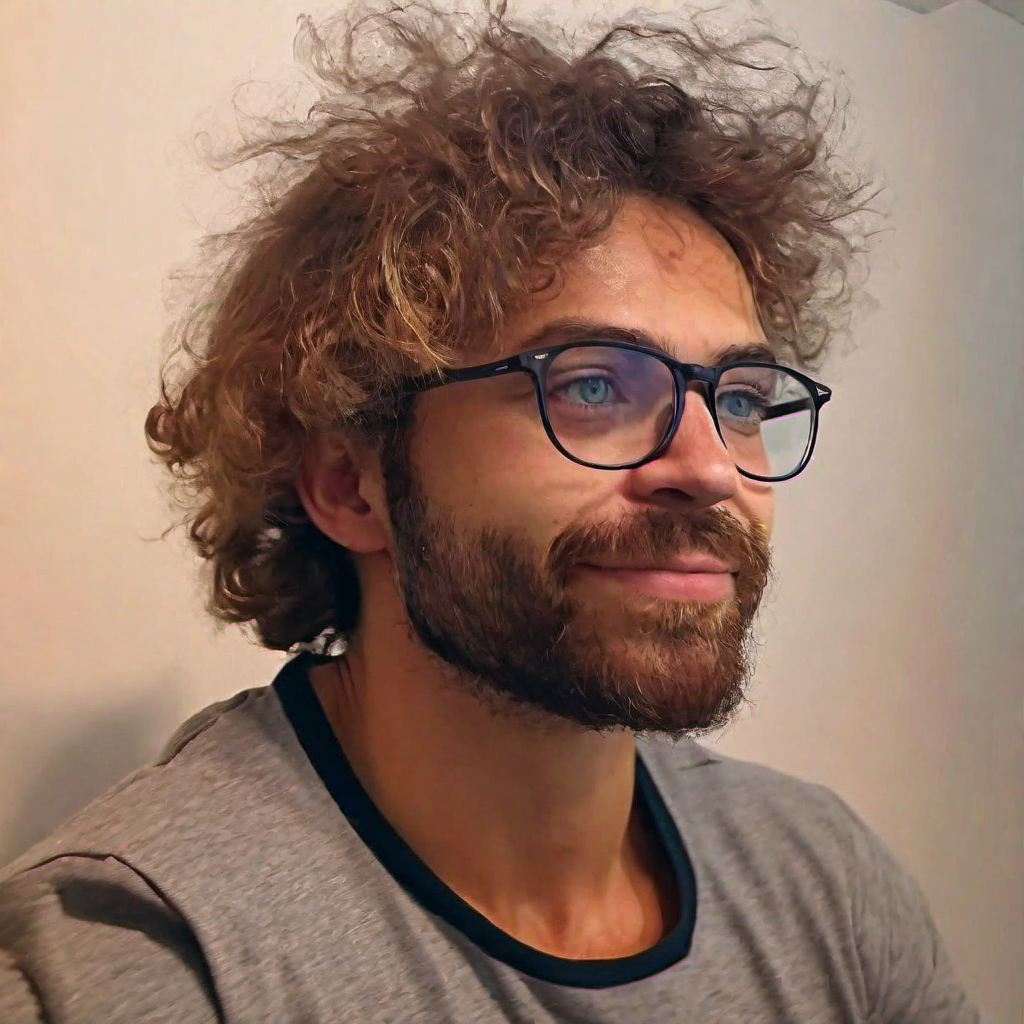

In [9]:
image = pipe("beautiful sks man photography, 8k, highly detailed, 8k, ", negative_prompt="closed_eyes", num_inference_steps=50).images[0]
image

In [ ]:
image.save('last.jpg')

In [3]:
pipe.load_lora_weights?

Signature:
pipe.load_lora_weights(
    pretrained_model_name_or_path_or_dict: Union[str, Dict[str, torch.Tensor]],
    **kwargs,
)
Docstring:
Load LoRA weights specified in `pretrained_model_name_or_path_or_dict` into `self.unet` and
`self.text_encoder`.

All kwargs are forwarded to `self.lora_state_dict`.

See [`~loaders.LoraLoaderMixin.lora_state_dict`] for more details on how the state dict is loaded.

See [`~loaders.LoraLoaderMixin.load_lora_into_unet`] for more details on how the state dict is loaded into
`self.unet`.

See [`~loaders.LoraLoaderMixin.load_lora_into_text_encoder`] for more details on how the state dict is loaded
into `self.text_encoder`.

Parameters:
    pretrained_model_name_or_path_or_dict (`str` or `os.PathLike` or `dict`):
        See [`~loaders.LoraLoaderMixin.lora_state_dict`].
    kwargs (`dict`, *optional*):
        See [`~loaders.LoraLoaderMixin.lora_state_dict`].
File:      /workspace/sd-xl-experiments/lora/diffusers/src/diffusers/pipelines/stable_diffusio